# The MNIST Neural Network

<b> Import pickle, numpy, matplotlib, and the Sequential and Dense classes from Keras </b>

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

<b> Load the mnist.pkl file </b>

In [2]:
with open('datasets/mnist.pkl', 'rb') as f:
    data = pickle.load(f, encoding='bytes')

In [3]:
images = data['images']
labels = data['labels']

<b> Plot the first 10 samples along with the corresponding labels </b>

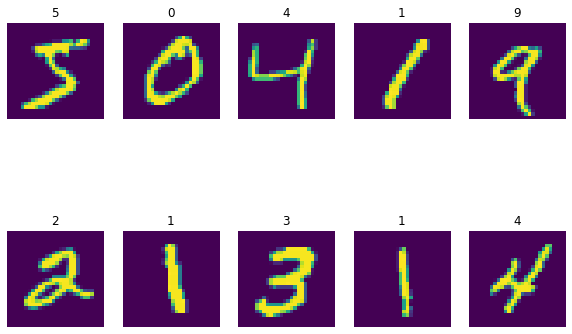

In [4]:
plt.figure(figsize=(10, 7))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')

<b> Encode the labels using one-hot encoding </b>

In [5]:
one_hot_labels = np.zeros((images.shape[0], 10))

for idx, lab in enumerate(labels):
    one_hot_labels[idx, lab] = 1

In [6]:
one_hot_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

<b> Prepare the images for input into a neural network. As a hint, there are two separate steps in this process </b>

In [7]:
images = images.reshape((-1, 28 * 28))
images = images / 255

<b> Construct a neural network model in Keras that accepts the prepared images and has a hidden layer of 600 units with a ReLU activation function and an output of the same number of units as classes. The output layer uses a softmax activation function </b>

In [8]:
model = Sequential(
    [Dense(600, input_shape=(28 * 28, ), activation='relu'), 
     Dense(10, activation='softmax')]
                  )

<b> Compile the model using multiclass cross-entropy, stochastic gradient descent, and an accuracy performance metric </b>

In [9]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

<b> Train the model. How many epochs are required to achieve at least 95% classification accuracy on the training data? </b>

In [10]:
model.fit(images, one_hot_labels, epochs=20)

Epoch 1/20
313/313 [==============================] - 2s 4ms/step - loss: 1.7325 - accuracy: 0.5261
Epoch 2/20
313/313 [==============================] - 1s 4ms/step - loss: 0.6762 - accuracy: 0.8542
Epoch 3/20
313/313 [==============================] - 2s 5ms/step - loss: 0.4892 - accuracy: 0.8825
Epoch 4/20
313/313 [==============================] - 2s 5ms/step - loss: 0.4206 - accuracy: 0.8913
Epoch 5/20
313/313 [==============================] - 2s 5ms/step - loss: 0.3724 - accuracy: 0.9016
Epoch 6/20
313/313 [==============================] - 2s 5ms/step - loss: 0.3448 - accuracy: 0.9111
Epoch 7/20
313/313 [==============================] - 2s 5ms/step - loss: 0.3201 - accuracy: 0.9150
Epoch 8/20
313/313 [==============================] - 2s 6ms/step - loss: 0.3013 - accuracy: 0.9240
Epoch 9/20
313/313 [==============================] - 2s 5ms/step - loss: 0.2827 - accuracy: 0.9264
Epoch 10/20
313/313 [==============================] - 2s 5ms/step - loss: 0.2759 - accuracy: 0.9290

# Simple MNIST Autoencoder

In [11]:
# import packages
from keras.models import Model
from keras.layers import Input, Dense

<b> Construct a simple autoencoder network that reduces the image size to 10 x 10 after the encoding stage </b>

In [12]:
input_layer = Input(shape=(28 , 28 , ))

In [13]:
encoding_stage = Dense(10 * 10, activation='relu')(input_layer)

In [14]:
# define decode layer
decoding_stage = Dense(28, activation='sigmoid')(encoding_stage)

In [15]:
# construct the model
autoencoder = Model(input_layer, decoding_stage)

<b> Compile the autoencoder using a binary cross-entropy loss function and adadelta gradient descent </b>

In [16]:
# compile the autoencoder
autoencoder.compile(loss='binary_crossentropy', optimizer='adadelta')

<b> Fit the encoder model </b>

In [17]:
# fit the model
autoencoder.fit(data['images'], data['images'], epochs=100)

Epoch 1/100
313/313 [==============================] - 2s 4ms/step - loss: -331.6611
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: -415.6839
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: -513.7254
Epoch 4/100
313/313 [==============================] - 2s 6ms/step - loss: -632.7553
Epoch 5/100
313/313 [==============================] - 2s 5ms/step - loss: -755.0660
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: -890.0079
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: -1042.2948
Epoch 8/100
313/313 [==============================] - 1s 4ms/step - loss: -1201.0575
Epoch 9/100
313/313 [==============================] - 1s 4ms/step - loss: -1357.5784
Epoch 10/100
313/313 [==============================] - 1s 4ms/step - loss: -1544.9532
Epoch 11/100
313/313 [==============================] - 1s 4ms/step - loss: -1750.6047
Epoch 12/100
313/313 [==============================] - 2s

313/313 [==============================] - 1s 3ms/step - loss: -1727484378.0892
Epoch 91/100
313/313 [==============================] - 1s 4ms/step - loss: -1943020663.0318
Epoch 92/100
313/313 [==============================] - 1s 4ms/step - loss: -2210824122.7006
Epoch 93/100
313/313 [==============================] - 1s 4ms/step - loss: -2503444449.8344
Epoch 94/100
313/313 [==============================] - 1s 4ms/step - loss: -2809137446.3185
Epoch 95/100
313/313 [==============================] - 1s 4ms/step - loss: -3144036955.3121
Epoch 96/100
313/313 [==============================] - 1s 4ms/step - loss: -3534188511.3885
Epoch 97/100
313/313 [==============================] - 1s 4ms/step - loss: -3949128848.3057
Epoch 98/100
313/313 [==============================] - 1s 4ms/step - loss: -4403237633.6306
Epoch 99/100
313/313 [==============================] - 1s 4ms/step - loss: -4937098349.2484
Epoch 100/100
313/313 [==============================] - 1s 4ms/step - loss: -55648

<b> Calculate and store the output of the encoding stage for the first five samples </b>

In [18]:
encoder_output = Model(input_layer, encoding_stage).predict(data['images'][:5])

<b> Reshape the encoder output to 10 x 10 (10 x 10 = 100) pixels and multiply by 255 </b>

In [19]:
encoder_output = encoder_output.reshape((-1, 10, 10)) * 255

<b> Calculate and store the output of the decoding stage for the first five samples </b>

In [20]:
decoder_output = autoencoder.predict(data['images'][:5])

<b> Reshape the output of the decoder to 28 x 28 and multiply by 255 </b>

In [21]:
decoder_output = decoder_output.reshape((-1, 28, 28)) * 255

<b> Plot the original image, the encoder output, and the decoder </b>

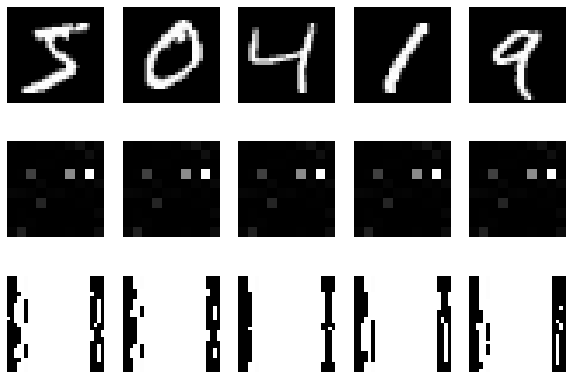

In [22]:
# reshape the original images
images = data['images'].reshape((-1, 28, 28))
plt.figure(figsize=(10, 7))
for i in range(5):
    # plot original image
    plt.subplot(3, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    # plot the encoder output
    plt.subplot(3, 5, i+6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')
    # plot the decoder output
    plt.subplot(3, 5, i+11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.axis('off')

# MNIST Convolutional Autoencoder

<b> Import pickle, numpy, and matplotlib, as well as the Model class, from keras.models, and import Input, Conv2D, MaxPooling2D, and UpSampling2D from keras.layers </b>

In [23]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

<b> Load the mnist.pkl file </b>

In [24]:
with open('datasets/mnist.pkl', 'rb') as f:
    images = pickle.load(f)['images']

<b> Rescale the images to have values between 0 and 1 </b>

In [25]:
images = images / 255

<b> Reshape the images to have a shape of 28 x 28 x 1 </b>

In [26]:
images = images.reshape((-1, 28, 28, 1))

<b> Define an input layer. We will use the same shape input as an image </b>

In [27]:
input_layer = Input(shape=(28, 28, 1))

<b> Add a convolutional stage, with 16 layers or filters, a 3 x 3 weight matrix, a ReLU activation function, and using the same padding, which means the output has the same length as the input image </b>

In [28]:
hidden_encoding = Conv2D(16,
                        (3, 3),
                        activation='relu',
                        padding='same',)(input_layer)

<b> Add a max pooling layer to the encoder with a 2 x 2 kernel </b>

In [29]:
encoded = MaxPooling2D((2, 2))(hidden_encoding)

<b> Add a decoding convolutional layer </b>

In [30]:
hidden_decoding = Conv2D(16, 
                        (3, 3),
                        activation='relu',
                        padding='same',)(encoded)

<b> Add an upsampling layer </b>

In [31]:
upsample_decoding = UpSampling2D((2, 2))(hidden_decoding)

<b> Add the final convolutional stage using one layer as per the initial image depth </b>

In [32]:
decoded = Conv2D(1,
                (3, 3),
                activation='relu',
                padding='same',)(upsample_decoding)

<b> Construct the model by passing the first and last layers of the network to the Model class </b>

In [33]:
autoencoder = Model(input_layer, decoded)

<b> Display the structure of the model </b>

In [34]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________

<b> Compile the autoencoder using a binary cross-entropy loss function and adadelta gradient descent </b>

In [35]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adadelta')

<b> Let's fit the model; again, we pass the images as the training data and as the desired output </b>

In [36]:
autoencoder.fit(images, images, epochs=20)

Epoch 1/20
313/313 [==============================] - 17s 53ms/step - loss: 0.3632
Epoch 2/20
313/313 [==============================] - 18s 59ms/step - loss: 0.3446
Epoch 3/20
313/313 [==============================] - 21s 67ms/step - loss: 0.3319
Epoch 4/20
313/313 [==============================] - 23s 72ms/step - loss: 0.3183
Epoch 5/20
313/313 [==============================] - 27s 86ms/step - loss: 0.3015
Epoch 6/20
313/313 [==============================] - 26s 83ms/step - loss: 0.2868
Epoch 7/20
313/313 [==============================] - 19s 62ms/step - loss: 0.2779
Epoch 8/20
313/313 [==============================] - 18s 59ms/step - loss: 0.2670- ETA: 1s - loss: 0.
Epoch 9/20
313/313 [==============================] - 19s 62ms/step - loss: 0.2550 0s - lo
Epoch 10/20
313/313 [==============================] - 19s 60ms/step - loss: 0.2453 0s - l
Epoch 11/20
313/313 [==============================] - 18s 58ms/step - loss: 0.2364
Epoch 12/20
313/313 [=============================

<b> Calculate and store the output of the encoding stage for the first five samples </b>

In [37]:
encoder_output = Model(input_layer, encoded).predict(images[:5])

<b> Reshape the encoder output for visualization, where each image is X*Y in size </b>

In [38]:
encoder_output = encoder_output.reshape((-1, 14 * 14, 16))

<b> Get the output of the decoder for the first five images </b>

In [39]:
decoder_output = autoencoder.predict(images[:5])

<b> Reshape the decoder output to be 28 x 28 in size </b>

In [40]:
decoder_output = decoder_output.reshape((-1, 28, 28))

<b> Reshape the original images back to be 28 x 28 in size </b>

In [41]:
images = images.reshape((-1, 28, 28))

<b> Plot the original image, the mean encoder output, and the decoder </b>

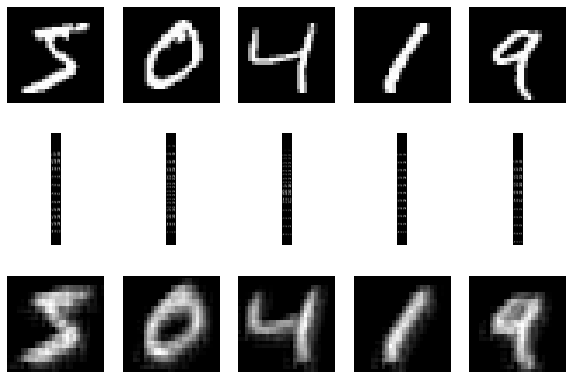

In [42]:
plt.figure(figsize=(10, 7))
for i in range(5):
    # Plot the original digit images
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    # Plot the encoder output
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')
    # Plot the decoder output
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.axis('off')